In [48]:
import os
print(os.listdir("../input"))

['train-images-idx3-ubyte', 'train-labels-idx1-ubyte', 't10k-labels-idx1-ubyte', 'fashion-mnist_train.csv', 't10k-images-idx3-ubyte', 'fashion-mnist_test.csv']


In [49]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import animation, rc

In [50]:
data = pd.read_csv('../input/fashion-mnist_train.csv')
print('Dataframe Shape:', data.shape)

Dataframe Shape: (60000, 785)


In [51]:
x = data.iloc[:, 1:].values
print('Feature matrix:\n', x)
print('Shape of Feature matrix:', x.shape)

Feature matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Shape of Feature matrix: (60000, 784)


In [52]:
y = data.iloc[:, :1].values.flatten()
print('Labels:\n', y)
print('Shape of Labels:', y.shape)

Labels:
 [2 9 6 ... 8 8 7]
Shape of Labels: (60000,)


In [53]:
def display(index):
    plt.imshow(x[index].reshape(28, 28), cmap = 'gray')
    plt.title(str(y[index]))
    plt.show()

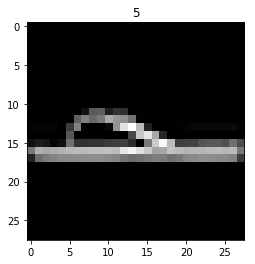

In [54]:
display(1177)

In [55]:
def one_hot_encode(y):
    return np.eye(10)[y]
y_encoded = one_hot_encode(y)
print('Shape of y after encoding:', y_encoded.shape)

Shape of y after encoding: (60000, 10)


In [56]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state = 42)

In [57]:
learning_rate = 0.001
batch_size = 128
epochs = 3500
display_step = 100

In [58]:
n_inputs = 784
nh1 = 1000
nh2 = 1000
nh3 = 1000
nh4 = 1000
nh5 = 1000
n_outputs = 10

In [59]:
X = tf.placeholder('float', [None, n_inputs])
Y = tf.placeholder('float', [None, n_outputs])

In [60]:
weights = {
    'w1' : tf.Variable(tf.random_normal([n_inputs, nh1])),
    'w2' : tf.Variable(tf.random_normal([nh1, nh2])),
    'w3' : tf.Variable(tf.random_normal([nh2, nh3])),
    'w4' : tf.Variable(tf.random_normal([nh3, nh4])),
    'w5' : tf.Variable(tf.random_normal([nh4, nh5])),
    'out' : tf.Variable(tf.random_normal([nh5, n_outputs]))
}

In [61]:
biases = {
    'b1' : tf.Variable(tf.random_normal([nh1])),
    'b2' : tf.Variable(tf.random_normal([nh2])),
    'b3' : tf.Variable(tf.random_normal([nh3])),
    'b4' : tf.Variable(tf.random_normal([nh4])),
    'b5' : tf.Variable(tf.random_normal([nh5])),
    'out' : tf.Variable(tf.random_normal([n_outputs]))
}

In [62]:
def neural_network(x, weights, biases):
    layer1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
    layer1=tf.nn.relu(layer1)
    layer2 = tf.add(tf.matmul(layer1, weights['w2']), biases['b2'])
    layer2=tf.nn.relu(layer2)
    layer3 = tf.add(tf.matmul(layer2, weights['w3']), biases['b3'])
    layer3=tf.nn.relu(layer3)
    layer4 = tf.add(tf.matmul(layer3, weights['w4']), biases['b4'])
    layer4=tf.nn.relu(layer4)
    layer5 = tf.add(tf.matmul(layer4, weights['w5']), biases['b5'])
    layer5=tf.nn.relu(layer5)
    layer_out = tf.matmul(layer5, weights['out']) + biases['out']
    return layer_out

In [63]:
logits = neural_network(X, weights, biases)

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y))

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss_op)

correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [64]:
def next_batch(batch_size, data, labels):
    idx = np.arange(0, len(data))
    np.random.shuffle(idx)
    idx = idx[: batch_size]
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [65]:
init = tf.global_variables_initializer()

In [66]:
with tf.Session() as sess:
    
    sess.run(init)
    
    cost_hist, acc_hist = [], []
    
    for epoch in range(1, epochs + 1):
        batch_x, batch_y = next_batch(batch_size, x_train, y_train)
        
        sess.run(training_op, feed_dict = { X : batch_x, Y : batch_y })
        
        if epoch % display_step == 0:
            c, acc = sess.run([loss_op, accuracy], feed_dict = { X : batch_x, Y : batch_y })
            cost_hist.append(c)
            acc_hist.append(acc)
            print('Epoch ' + str(epoch) + ', Cost: ' + str(c) + ', Accuracy: ' + str(acc))
    
    W = sess.run(weights)
    B = sess.run(biases)
    print('Accuracy on train data: ' + str(sess.run(accuracy, feed_dict = { X : x_train, Y : y_train }) * 100) + ' %')
    print('Accuracy on test data: ' + str(sess.run(accuracy, feed_dict = { X : x_test, Y : y_test }) * 100) + ' %')

Epoch 100, Cost: 983142000.0, Accuracy: 0.7109375
Epoch 200, Cost: 651700500.0, Accuracy: 0.765625
Epoch 300, Cost: 368251070.0, Accuracy: 0.8125
Epoch 400, Cost: 243299250.0, Accuracy: 0.828125
Epoch 500, Cost: 323876030.0, Accuracy: 0.890625
Epoch 600, Cost: 284746400.0, Accuracy: 0.859375
Epoch 700, Cost: 196723520.0, Accuracy: 0.8828125
Epoch 800, Cost: 151473420.0, Accuracy: 0.8828125
Epoch 900, Cost: 203084320.0, Accuracy: 0.859375
Epoch 1000, Cost: 79177224.0, Accuracy: 0.9296875
Epoch 1100, Cost: 116093980.0, Accuracy: 0.8828125
Epoch 1200, Cost: 250638600.0, Accuracy: 0.8671875
Epoch 1300, Cost: 215483580.0, Accuracy: 0.828125
Epoch 1400, Cost: 81957130.0, Accuracy: 0.921875
Epoch 1500, Cost: 53255380.0, Accuracy: 0.90625
Epoch 1600, Cost: 44983896.0, Accuracy: 0.953125
Epoch 1700, Cost: 59343390.0, Accuracy: 0.9375
Epoch 1800, Cost: 132027096.0, Accuracy: 0.8828125
Epoch 1900, Cost: 68422070.0, Accuracy: 0.921875
Epoch 2000, Cost: 27411374.0, Accuracy: 0.953125
Epoch 2100, Co